In [1]:
import numpy as np
import os
import dataprovider as dp
from dataprovider import emio

/usr/people/kisuk/miniconda2/envs/conda36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
base_dir = '~/Data_local/datasets/pinky/ground_truth/stitched_vol40-vol41/'
base_dir = os.path.expanduser(base_dir)

# Input
fname = os.path.join(base_dir, 'img.h5')
img = emio.imread(fname).astype('float32') / 255.0

# Target
fname = os.path.join(base_dir, 'seg.h5')
seg = emio.imread(fname)

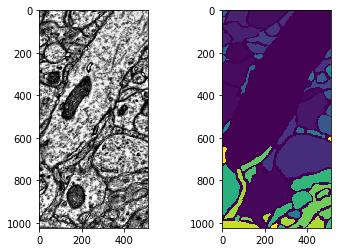

In [3]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(img[1,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(seg[1,:,:])
plt.show()

In [4]:
# Create dataset.
dataset = dp.VolumeDataset()
dataset.add_raw_data('input', img)
dataset.add_raw_data('segmentation', seg)
w = 256
spec = dict(input=(20,w,w), segmentation=(20,w,w))
dataset.set_spec(spec)

In [5]:
import augmentor as aug

# Augmentor.
# misalign = aug.SlipMisalign((5,50))
# misalign = aug.MisalignPlusMissing((5,50))
track = aug.Track()
misalign = aug.MisalignTrackMissing(track, (5,50))

In [6]:
# Save sample in h5.
def save_sample(fname, sample):
    import h5py
    with h5py.File(fname, 'w') as f:
        for k in sample:
            f.create_dataset(k, data=sample[k])

In [7]:
new_spec = misalign.prepare(spec, imgs=['input'])
sample = dataset.random_sample(spec=new_spec)
save_sample('sample.h5', sample)
sample = misalign(sample)
save_sample('sample_misaligned.h5', sample)